<a href="https://colab.research.google.com/github/Vaishnavi-Devendran/Emotion_Analysis-Sentiment_Analysis-PDF-to-text-Extraction/blob/main/OADA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Batch 5, Polyak step size: 0.536957
Batch 10, Polyak step size: 0.803171
Batch 5, Polyak step size: 2.847765
Batch 10, Polyak step size: 1.160047
Batch 5, Polyak step size: 0.777228
Batch 10, Polyak step size: 1.041815
Batch 5, Polyak step size: 0.413408
Batch 10, Polyak step size: 0.676210
Batch 5, Polyak step size: 6.474683
Batch 10, Polyak step size: 0.602513
Epoch 5/20, Avg Loss: 0.013417
Batch 5, Polyak step size: 0.148252
Batch 10, Polyak step size: 0.599115
Batch 5, Polyak step size: 1.060441
Batch 10, Polyak step size: 0.301425
Batch 5, Polyak step size: 11.084877
Batch 10, Polyak step size: 0.255963
Batch 5, Polyak step size: 1.335867
Batch 10, Polyak step size: 0.754346
Batch 5, Polyak step size: 2.325700
Batch 10, Polyak step size: 0.556069
Epoch 10/20, Avg Loss: 0.014832
Batch 5, Polyak step size: 1.098097
Batch 10, Polyak step size: 1.191075
Batch 5, Polyak step size: 0.227199
Batch 10, Polyak step size: 0.210084
Batch 5, Polyak step size: 2.217710
Batch 10, Polyak step si

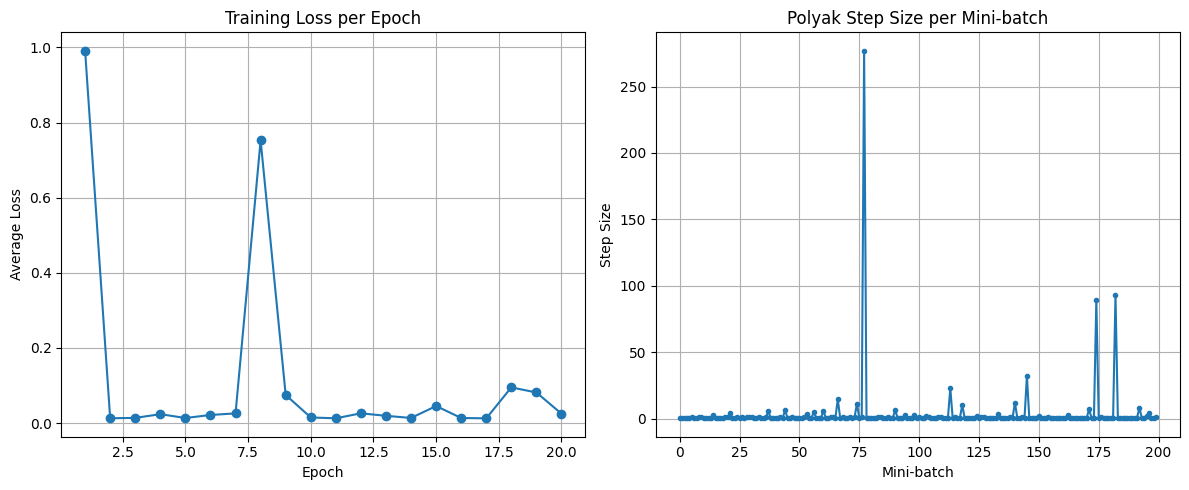

In [2]:
#1.a
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Step 1: Define a simple linear model: y = wx + b
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature -> 1 output

    def forward(self, x):
        return self.linear(x)

# Step 2: Define Polyak SGD training function with tracking
def polyak_sgd(model, loss_fn, train_loader, num_epochs=20, epsilon=1e-8):
    model.train()
    epoch_losses = []        # Store average loss per epoch
    polyak_steps = []        # Store Polyak step sizes

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
            model.zero_grad()

            # Forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)

            # Backward pass
            loss.backward()

            # Calculate gradient norm squared
            grad_norm_squared = 0.0
            for param in model.parameters():
                if param.grad is not None:
                    grad_norm_squared += (param.grad ** 2).sum()

            grad_norm_squared = grad_norm_squared.item()

            # Calculate Polyak step size
            polyak_step = (loss.item()) / (grad_norm_squared + epsilon)
            polyak_steps.append(polyak_step)

            # Manual parameter update
            with torch.no_grad():
                for param in model.parameters():
                    if param.grad is not None:
                        param -= polyak_step * param.grad

            epoch_loss += loss.item()

            # Optional: Print step size occasionally
            if (batch_idx + 1) % 5 == 0:
                print(f"Batch {batch_idx+1}, Polyak step size: {polyak_step:.6f}")

        avg_epoch_loss = epoch_loss / len(train_loader)
        epoch_losses.append(avg_epoch_loss)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {avg_epoch_loss:.6f}")

    return epoch_losses, polyak_steps

# Step 3: Generate synthetic data
torch.manual_seed(0)  # For reproducibility
x_train = torch.randn(100, 1)  # 100 samples, 1 feature
y_train = 3 * x_train + 1 + 0.1 * torch.randn(100, 1)  # True relation y = 3x + 1 + noise

# Create DataLoader for mini-batch training
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# Step 4: Initialize model and loss function
model = SimpleLinearModel()
loss_fn = nn.MSELoss()

# Step 5: Train the model using Polyak SGD and collect data
epoch_losses, polyak_steps = polyak_sgd(model, loss_fn, train_loader, num_epochs=20)

# Step 6: Tests after training

# Test 1 & 2: Check final learned weight and bias
learned_weight = model.linear.weight.item()
learned_bias = model.linear.bias.item()
print("\nAfter training:")
print(f"Learned weight: {learned_weight:.4f} (Expected ~3.0)")
print(f"Learned bias: {learned_bias:.4f} (Expected ~1.0)")

# Step 7: Visualizations

# Plot training loss per epoch
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, len(epoch_losses)+1), epoch_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)

# Plot Polyak step sizes
plt.subplot(1,2,2)
plt.plot(polyak_steps, marker='.')
plt.title('Polyak Step Size per Mini-batch')
plt.xlabel('Mini-batch')
plt.ylabel('Step Size')
plt.grid(True)

plt.tight_layout()
plt.show()



### Noise Level: 0.05 ###

Batch Size: 5


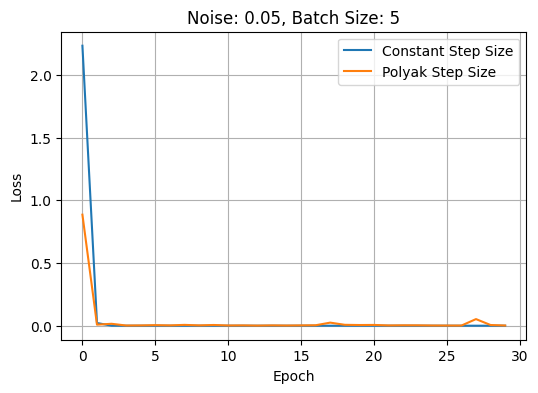


Batch Size: 10


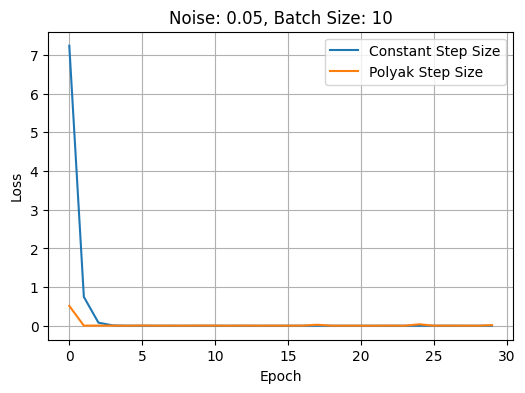


Batch Size: 20


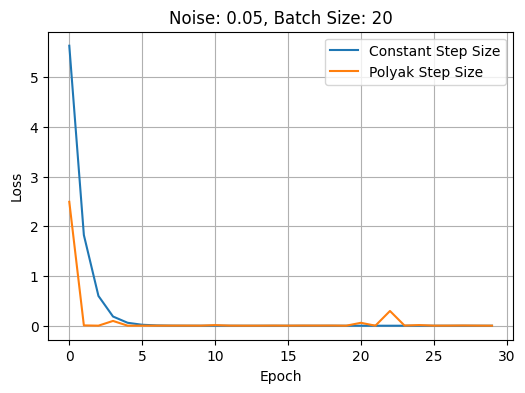


Batch Size: 50


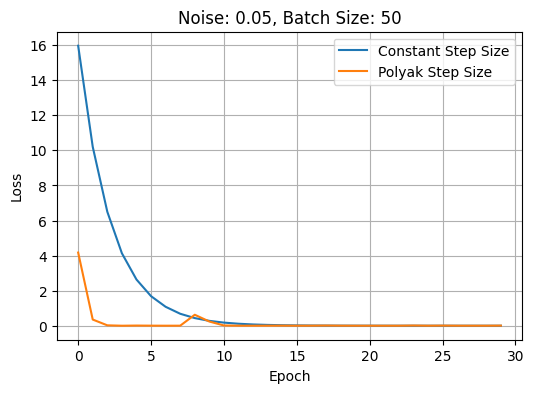


### Noise Level: 0.1 ###

Batch Size: 5


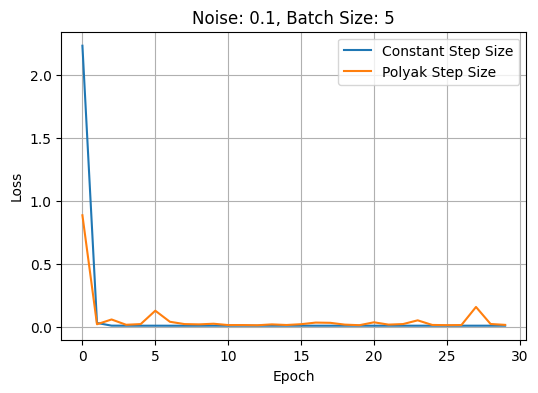


Batch Size: 10


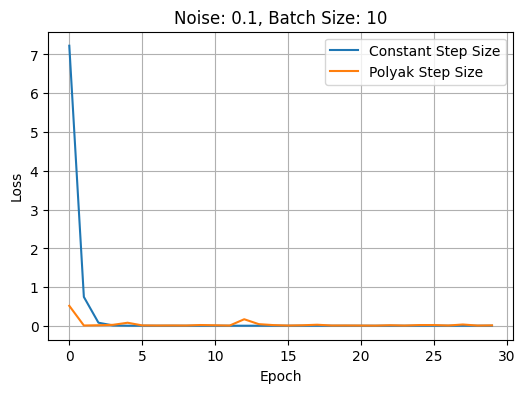


Batch Size: 20


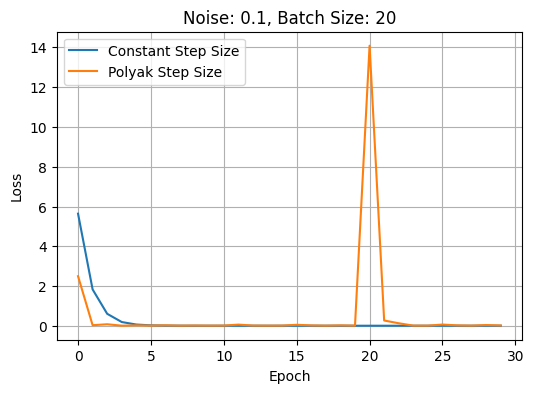


Batch Size: 50


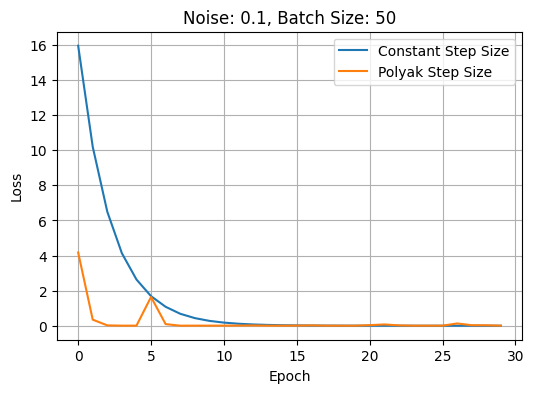


### Noise Level: 0.5 ###

Batch Size: 5


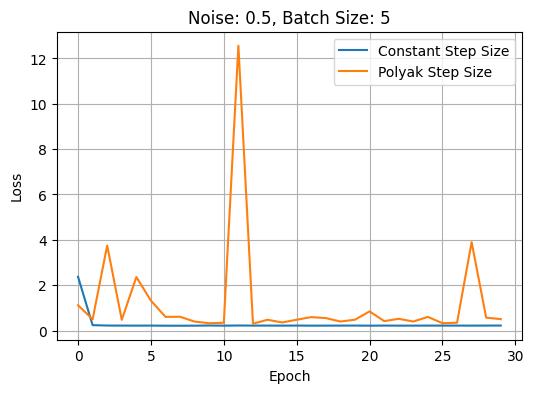


Batch Size: 10


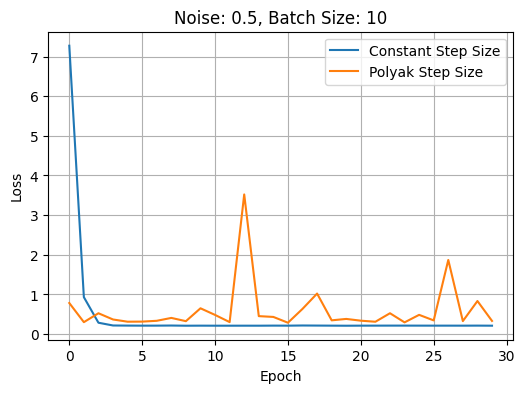


Batch Size: 20


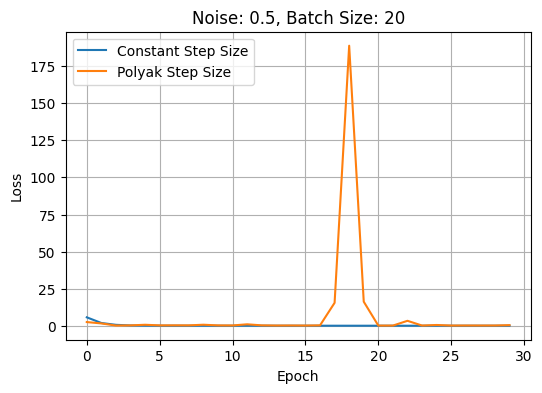


Batch Size: 50


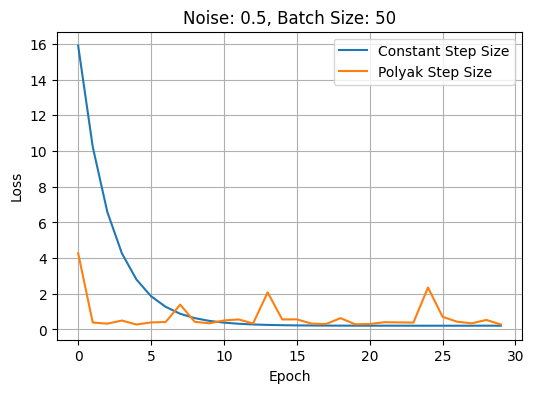

In [3]:
#1.b
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Model
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Generate synthetic data
def generate_synthetic_data(n_samples=100, noise_std=0.1):
    torch.manual_seed(0)
    x = torch.randn(n_samples, 1)
    noise = noise_std * torch.randn(n_samples, 1)
    y = 3 * x + 1 + noise
    return x, y

# Constant SGD
def constant_sgd(model, loss_fn, train_loader, lr=0.01, num_epochs=20):
    model.train()
    losses = []
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(train_loader))
    return model, losses

# Polyak SGD
def polyak_sgd(model, loss_fn, train_loader, num_epochs=20, epsilon=1e-8):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x_batch, y_batch in train_loader:
            model.zero_grad()
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            grad_norm_squared = sum((param.grad**2).sum() for param in model.parameters() if param.grad is not None).item()
            polyak_step = (loss.item()) / (grad_norm_squared + epsilon)
            with torch.no_grad():
                for param in model.parameters():
                    if param.grad is not None:
                        param -= polyak_step * param.grad
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(train_loader))
    return model, losses

# Now run experiments
noise_levels = [0.05, 0.1, 0.5]
batch_sizes = [5, 10, 20, 50]

for noise_std in noise_levels:
    print(f"\n### Noise Level: {noise_std} ###")
    x_train, y_train = generate_synthetic_data(noise_std=noise_std)
    for batch_size in batch_sizes:
        print(f"\nBatch Size: {batch_size}")

        train_dataset = TensorDataset(x_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Train with constant step
        model_constant = SimpleLinearModel()
        loss_fn = nn.MSELoss()
        model_constant, losses_constant = constant_sgd(model_constant, loss_fn, train_loader, lr=0.05, num_epochs=30)

        # Train with Polyak step
        model_polyak = SimpleLinearModel()
        loss_fn = nn.MSELoss()
        model_polyak, losses_polyak = polyak_sgd(model_polyak, loss_fn, train_loader, num_epochs=30)

        # Plot the losses
        plt.figure(figsize=(6,4))
        plt.plot(losses_constant, label='Constant Step Size')
        plt.plot(losses_polyak, label='Polyak Step Size')
        plt.title(f'Noise: {noise_std}, Batch Size: {batch_size}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()


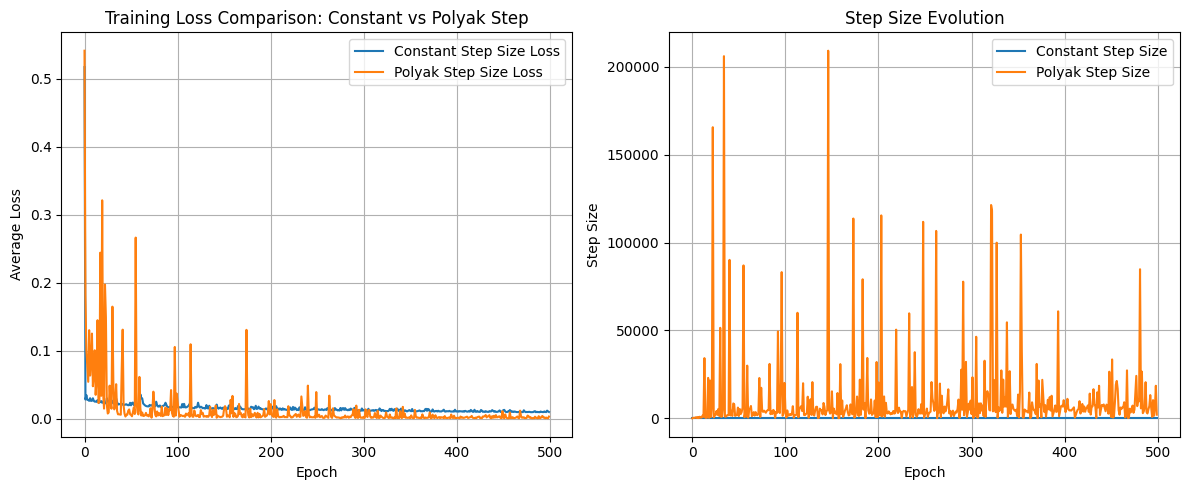

In [4]:
#1.c
# week 6 training data and model, and standard loss function -- cross entropy
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Step 1: Generate training data from Week 6
def generate_trainingdata(m=25):
    return np.array([0, 0]) + 0.25 * np.random.randn(m, 2)

X_train = generate_trainingdata(m=100)
X_train = torch.tensor(X_train, dtype=torch.float32)

# Step 2: Create simple binary labels
y_train = ((X_train[:, 0] + X_train[:, 1]) > 0).long()

# Step 3: DataLoader
batch_size = 50
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Step 4: Define loss function
loss_fn = nn.CrossEntropyLoss()

# Step 5: Model = a simple 2D vector x, mapping 2D input -> 2 classes
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(2, 2) * 0.01)  # 2 input -> 2 output

    def forward(self, x):
        return x @ self.weights  # Linear mapping

# Step 6: Training functions

# 1. Constant Step Size SGD
def constant_sgd(model, loss_fn, train_loader, lr=0.1, num_epochs=50):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []
    step_sizes = []  # Record constant step size (always the same)
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            logits = model(x_batch)
            loss = loss_fn(logits, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(train_loader))
        step_sizes.append(lr)  # Always same constant step size
    return model, losses, step_sizes

# 2. Polyak Step Size SGD
def polyak_sgd(model, loss_fn, train_loader, num_epochs=50, epsilon=1e-8):
    losses = []
    step_sizes = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        total_polyak_step = 0.0
        count_batches = 0
        for x_batch, y_batch in train_loader:
            model.zero_grad()
            logits = model(x_batch)
            loss = loss_fn(logits, y_batch)
            loss.backward()

            grad_norm_squared = sum((param.grad**2).sum() for param in model.parameters() if param.grad is not None).item()
            polyak_step = (loss.item()) / (grad_norm_squared + epsilon)

            with torch.no_grad():
                for param in model.parameters():
                    if param.grad is not None:
                        param -= polyak_step * param.grad

            epoch_loss += loss.item()
            total_polyak_step += polyak_step
            count_batches += 1

        avg_polyak_step = total_polyak_step / count_batches
        losses.append(epoch_loss / len(train_loader))
        step_sizes.append(avg_polyak_step)  # Average step size over all mini-batches
    return model, losses, step_sizes

# Step 7: Train models and compare

# Hyperparameters
learning_rate = 300
num_epochs = 500

# Train with constant step size
model_constant = SimpleLinearModel()
model_constant, losses_constant, step_sizes_constant = constant_sgd(model_constant, loss_fn, train_loader, lr=learning_rate, num_epochs=num_epochs)

# Train with Polyak step size
model_polyak = SimpleLinearModel()
model_polyak, losses_polyak, step_sizes_polyak = polyak_sgd(model_polyak, loss_fn, train_loader, num_epochs=num_epochs)

# Step 8: Plot loss curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses_constant, label='Constant Step Size Loss')
plt.plot(losses_polyak, label='Polyak Step Size Loss')
plt.title('Training Loss Comparison: Constant vs Polyak Step')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)

# Step 9: Plot step size curves
plt.subplot(1,2,2)
plt.plot(step_sizes_constant, label='Constant Step Size')
plt.plot(step_sizes_polyak, label='Polyak Step Size')
plt.title('Step Size Evolution')
plt.xlabel('Epoch')
plt.ylabel('Step Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


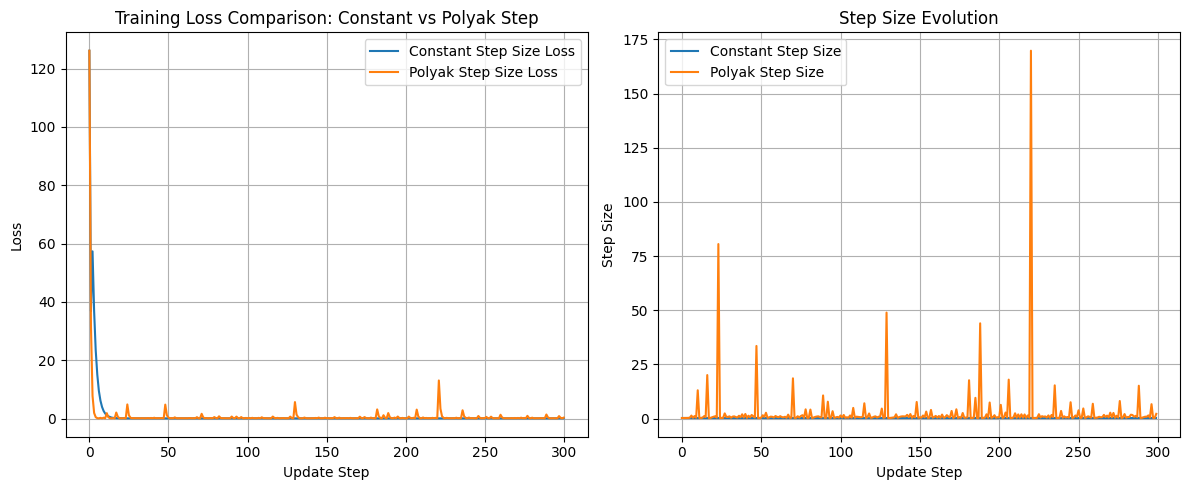

In [5]:
# 1.c
# week 6 training and custom loss function
# 1.c Final Updated Version - Using Week 6 Training Data and Custom Loss Function

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate training data (Week 6)
def generate_trainingdata(m=25):
    return np.array([0,0]) + 0.25 * np.random.randn(m, 2)

# Step 2: Define the custom loss function f(x, minibatch)
def f(x, minibatch):
    y = 0
    count = 0
    for w in minibatch:
        z = x - w - 1
        y = y + min(32*(z[0]**2 + z[1]**2), (z[0]+8)**2 + (z[1]+3)**2)
        count += 1
    return y / count

# Step 3: Define the finite-difference gradient
def grad_f_fd(x, minibatch, h=1e-6):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = x.copy()
        x_backward = x.copy()
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward, minibatch) - f(x_backward, minibatch)) / (2*h)
    return grad

# Step 4: Mini-batch SGD methods (constant and Polyak step size)
def mini_batch_sgd(f, grad_f, training_data, x_init,
                   step_rule='constant',
                   alpha=0.1,
                   batch_size=5,
                   num_epochs=5,
                   f_opt=0.0,      # For Polyak
                   epsilon=1e-8):

    x = x_init.copy()
    x_history = [x.copy()]
    f_history = [f(x, training_data)]
    step_sizes = []

    n = training_data.shape[0]

    for epoch in range(num_epochs):
        indices = np.random.permutation(n)
        shuffled_data = training_data[indices]

        for i in range(0, n, batch_size):
            minibatch = shuffled_data[i:i+batch_size]
            grad = grad_f(x, minibatch)

            if step_rule == 'constant':
                step_size = alpha
                update = alpha * grad
            elif step_rule == 'polyak':
                grad_norm_sq = np.dot(grad, grad)
                if grad_norm_sq == 0:
                    step_size = 0
                    update = 0
                else:
                    current_loss = f(x, minibatch)
                    step_size = (current_loss - f_opt) / (grad_norm_sq + epsilon)
                    update = step_size * grad
            else:
                raise ValueError("Unknown step rule specified.")

            x = x - update
            x_history.append(x.copy())
            f_history.append(f(x, training_data))
            step_sizes.append(step_size)

    return np.array(x_history), np.array(f_history), np.array(step_sizes)

# Step 5: Training Setup

# Generate training data
T = generate_trainingdata(m=100)

# Initial starting point
x_init = np.array([3.0, 3.0])

# Hyperparameters
learning_rate = 0.1
batch_size = 10
num_epochs = 30
f_opt = 0.0  # Minimum value assumed to be 0

# Train with constant step size
x_hist_const, f_hist_const, step_sizes_const = mini_batch_sgd(
    f, grad_f_fd, T, x_init,
    step_rule='constant',
    alpha=learning_rate,
    batch_size=batch_size,
    num_epochs=num_epochs,
    f_opt=f_opt
)

# Train with Polyak step size
x_hist_polyak, f_hist_polyak, step_sizes_polyak = mini_batch_sgd(
    f, grad_f_fd, T, x_init,
    step_rule='polyak',
    alpha=learning_rate,  # alpha not used in Polyak but passed
    batch_size=batch_size,
    num_epochs=num_epochs,
    f_opt=f_opt
)

# Step 6: Plotting

plt.figure(figsize=(12,5))

# Plot Loss Curves
plt.subplot(1,2,1)
plt.plot(f_hist_const, label='Constant Step Size Loss')
plt.plot(f_hist_polyak, label='Polyak Step Size Loss')
plt.title('Training Loss Comparison: Constant vs Polyak Step')
plt.xlabel('Update Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Step Size Curves
plt.subplot(1,2,2)
plt.plot(step_sizes_const, label='Constant Step Size')
plt.plot(step_sizes_polyak, label='Polyak Step Size')
plt.title('Step Size Evolution')
plt.xlabel('Update Step')
plt.ylabel('Step Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#1.d
import torch
import torch.nn as nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

# ========== Your Week 9 GPT Model ==========

batch_size = 64
block_size = 256
max_iters = 1000  # reduced iterations
eval_interval = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 100
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2

torch.manual_seed(1337)

# Load data
with open('/content/input_childSpeech_trainingSet.txt', 'r', encoding='utf-8') as f:
    text = f.read()

chars = sorted(list(set(text)))
vocab_size = len(chars)
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split):
    data_split = train_data if split == 'train' else val_data
    ix = torch.randint(len(data_split) - block_size, (batch_size,))
    x = torch.stack([data_split[i:i+block_size] for i in ix])
    y = torch.stack([data_split[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)
        q = self.query(x)
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        v = self.value(x)
        out = wei @ v
        return out

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedForward(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear) or isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if isinstance(module, nn.Linear) and module.bias is not None:
                torch.nn.init.zeros_(module.bias)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))
        x = tok_emb + pos_emb
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)
        if targets is None:
            loss = None
        else:
            logits = logits.view(-1, logits.size(-1))
            targets = targets.view(-1)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

# ========== Training Functions for 3 Methods ==========

def train_constant_sgd(model, learning_rate=0.05):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return train_model(model, optimizer)

def train_adam(model, learning_rate=3e-4):
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    return train_model(model, optimizer)

def train_polyak(model, epsilon=1e-8):
    model.train()
    train_losses = []
    val_losses = []
    for iter in range(max_iters):
        xb, yb = get_batch('train')
        model.zero_grad()
        logits, loss = model(xb, yb)
        loss.backward()
        grad_norm_squared = sum((param.grad**2).sum() for param in model.parameters() if param.grad is not None)
        grad_norm_squared = grad_norm_squared.item()
        polyak_step = loss.item() / (grad_norm_squared + epsilon)
        with torch.no_grad():
            for param in model.parameters():
                if param.grad is not None:
                    param -= polyak_step * param.grad

        if iter % eval_interval == 0:
            losses = estimate_loss(model)
            train_losses.append(losses['train'])
            val_losses.append(losses['val'])
            print(f"[Polyak] Iter {iter}: Train Loss {losses['train']:.4f}, Val Loss {losses['val']:.4f}")

    return train_losses, val_losses

def train_model(model, optimizer):
    model.train()
    train_losses = []
    val_losses = []
    for iter in range(max_iters):
        xb, yb = get_batch('train')
        logits, loss = model(xb, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if iter % eval_interval == 0:
            losses = estimate_loss(model)
            train_losses.append(losses['train'])
            val_losses.append(losses['val'])
            print(f"[{type(optimizer).__name__}] Iter {iter}: Train Loss {losses['train']:.4f}, Val Loss {losses['val']:.4f}")

    return train_losses, val_losses

# ========== Run Training for Each Method ==========

# SGD with constant step size
model_sgd = GPTLanguageModel().to(device)
sgd_train_losses, sgd_val_losses = train_constant_sgd(model_sgd, learning_rate=0.05)

# Polyak Step Size
model_polyak = GPTLanguageModel().to(device)
polyak_train_losses, polyak_val_losses = train_polyak(model_polyak)

# Adam Optimizer
model_adam = GPTLanguageModel().to(device)
adam_train_losses, adam_val_losses = train_adam(model_adam, learning_rate=3e-4)

# ========== Plot Comparison ==========

plt.figure(figsize=(10,5))
plt.plot(sgd_train_losses, label='SGD (Train Loss)')
plt.plot(sgd_val_losses, '--', label='SGD (Val Loss)')
plt.plot(polyak_train_losses, label='Polyak SGD (Train Loss)')
plt.plot(polyak_val_losses, '--', label='Polyak SGD (Val Loss)')
plt.plot(adam_train_losses, label='Adam (Train Loss)')
plt.plot(adam_val_losses, '--', label='Adam (Val Loss)')
plt.title('Comparison of Optimizers on Transformer Model')
plt.xlabel('Evaluation Checkpoints')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


[SGD] Iter 0: Train Loss 3.3912, Val Loss 3.3924
[SGD] Iter 100: Train Loss 2.0786, Val Loss 2.0832
[SGD] Iter 200: Train Loss 1.9828, Val Loss 1.9904
[SGD] Iter 300: Train Loss 1.9328, Val Loss 1.9414
[SGD] Iter 400: Train Loss 1.8808, Val Loss 1.8900
[SGD] Iter 500: Train Loss 1.8072, Val Loss 1.8221
[SGD] Iter 600: Train Loss 1.7623, Val Loss 1.7767
[SGD] Iter 700: Train Loss 1.7133, Val Loss 1.7298
[SGD] Iter 800: Train Loss 1.6320, Val Loss 1.6477
[SGD] Iter 900: Train Loss 1.5833, Val Loss 1.6020
[Polyak] Iter 0: Train Loss 4.3958, Val Loss 4.3981
[Polyak] Iter 100: Train Loss 4.2510, Val Loss 4.2612
[Polyak] Iter 200: Train Loss 4.2659, Val Loss 4.2908
[Polyak] Iter 300: Train Loss 4.0255, Val Loss 4.0533
[Polyak] Iter 400: Train Loss 3.3925, Val Loss 3.3867
[Polyak] Iter 500: Train Loss 6.8131, Val Loss 6.7976
[Polyak] Iter 600: Train Loss 2.9239, Val Loss 2.9259
[Polyak] Iter 700: Train Loss 3.4453, Val Loss 3.4428
[Polyak] Iter 800: Train Loss 3.9857, Val Loss 3.9822
[Polyak]

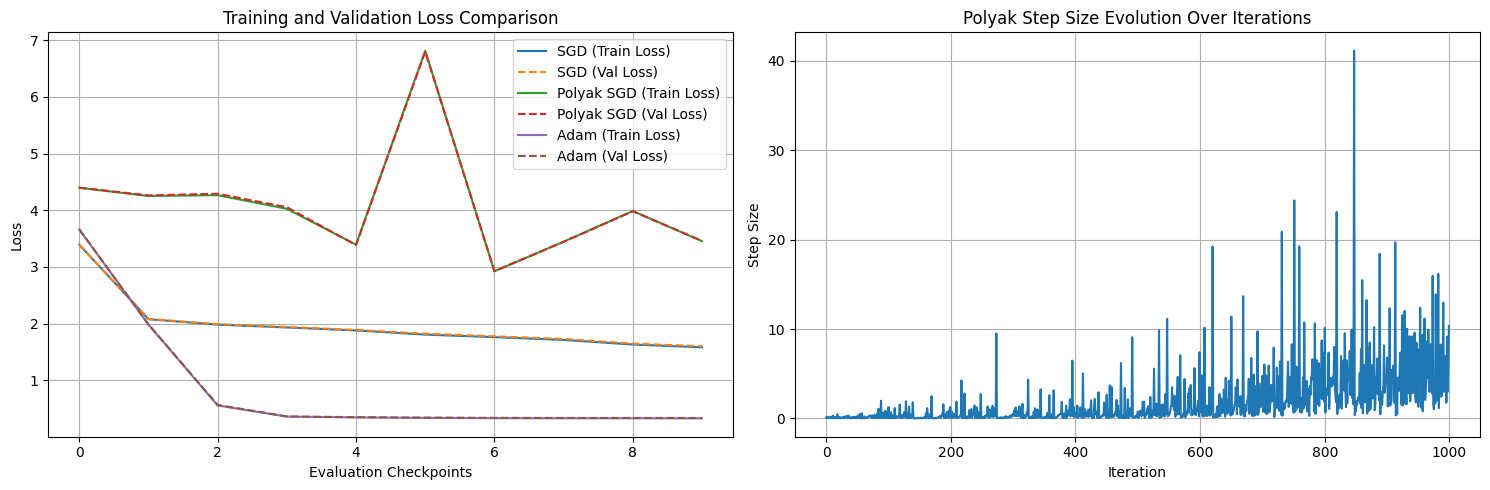

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

# ========== Your Week 9 GPT Model ==========

batch_size = 64
block_size = 256
max_iters = 1000  # reduced iterations
eval_interval = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 100
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2

torch.manual_seed(1337)

# Load data
with open('/content/input_childSpeech_trainingSet.txt', 'r', encoding='utf-8') as f:
    text = f.read()

chars = sorted(list(set(text)))
vocab_size = len(chars)
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split):
    data_split = train_data if split == 'train' else val_data
    ix = torch.randint(len(data_split) - block_size, (batch_size,))
    x = torch.stack([data_split[i:i+block_size] for i in ix])
    y = torch.stack([data_split[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)
        q = self.query(x)
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        v = self.value(x)
        out = wei @ v
        return out

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedForward(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear) or isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if isinstance(module, nn.Linear) and module.bias is not None:
                torch.nn.init.zeros_(module.bias)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))
        x = tok_emb + pos_emb
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)
        if targets is None:
            loss = None
        else:
            logits = logits.view(-1, logits.size(-1))
            targets = targets.view(-1)
            loss = F.cross_entropy(logits, targets)
        return logits, loss


# ========== Updated Training Functions for Step Size Tracking ==========

def train_constant_sgd(model, learning_rate=0.05):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return train_model(model, optimizer, track_step_size=False)

def train_adam(model, learning_rate=3e-4):
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    return train_model(model, optimizer, track_step_size=False)

def train_polyak(model, epsilon=1e-8):
    model.train()
    train_losses = []
    val_losses = []
    polyak_step_sizes = []
    for iter in range(max_iters):
        xb, yb = get_batch('train')
        model.zero_grad()
        logits, loss = model(xb, yb)
        loss.backward()
        grad_norm_squared = sum((param.grad**2).sum() for param in model.parameters() if param.grad is not None)
        grad_norm_squared = grad_norm_squared.item()
        polyak_step = loss.item() / (grad_norm_squared + epsilon)
        polyak_step_sizes.append(polyak_step)

        with torch.no_grad():
            for param in model.parameters():
                if param.grad is not None:
                    param -= polyak_step * param.grad

        if iter % eval_interval == 0:
            losses = estimate_loss(model)
            train_losses.append(losses['train'])
            val_losses.append(losses['val'])
            print(f"[Polyak] Iter {iter}: Train Loss {losses['train']:.4f}, Val Loss {losses['val']:.4f}")

    return train_losses, val_losses, polyak_step_sizes

def train_model(model, optimizer, track_step_size=False):
    model.train()
    train_losses = []
    val_losses = []
    for iter in range(max_iters):
        xb, yb = get_batch('train')
        logits, loss = model(xb, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if iter % eval_interval == 0:
            losses = estimate_loss(model)
            train_losses.append(losses['train'])
            val_losses.append(losses['val'])
            print(f"[{type(optimizer).__name__}] Iter {iter}: Train Loss {losses['train']:.4f}, Val Loss {losses['val']:.4f}")

    return train_losses, val_losses, None  # No step size tracking for constant SGD or Adam

# ========== Run Training for Each Method ==========

# SGD with constant step size
model_sgd = GPTLanguageModel().to(device)
sgd_train_losses, sgd_val_losses, _ = train_constant_sgd(model_sgd, learning_rate=0.05)

# Polyak Step Size
model_polyak = GPTLanguageModel().to(device)
polyak_train_losses, polyak_val_losses, polyak_step_sizes = train_polyak(model_polyak)

# Adam Optimizer
model_adam = GPTLanguageModel().to(device)
adam_train_losses, adam_val_losses, _ = train_adam(model_adam, learning_rate=3e-4)

# ========== Plot Comparison ==========

plt.figure(figsize=(15,5))

# Plot Loss Comparison
plt.subplot(1,2,1)
plt.plot(sgd_train_losses, label='SGD (Train Loss)')
plt.plot(sgd_val_losses, '--', label='SGD (Val Loss)')
plt.plot(polyak_train_losses, label='Polyak SGD (Train Loss)')
plt.plot(polyak_val_losses, '--', label='Polyak SGD (Val Loss)')
plt.plot(adam_train_losses, label='Adam (Train Loss)')
plt.plot(adam_val_losses, '--', label='Adam (Val Loss)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Evaluation Checkpoints')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Polyak Step Size Evolution
plt.subplot(1,2,2)
plt.plot(polyak_step_sizes)
plt.title('Polyak Step Size Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Step Size')
plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

# ========== Your Week 9 GPT Model ==========

batch_size = 64
block_size = 256
max_iters = 1000  # reduced iterations
eval_interval = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 100
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2

torch.manual_seed(1337)

# Load data
with open('/content/input_childSpeech_trainingSet.txt', 'r', encoding='utf-8') as f:
    text = f.read()

chars = sorted(list(set(text)))
vocab_size = len(chars)
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split):
    data_split = train_data if split == 'train' else val_data
    ix = torch.randint(len(data_split) - block_size, (batch_size,))
    x = torch.stack([data_split[i:i+block_size] for i in ix])
    y = torch.stack([data_split[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)
        q = self.query(x)
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        v = self.value(x)
        out = wei @ v
        return out

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedForward(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear) or isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if isinstance(module, nn.Linear) and module.bias is not None:
                torch.nn.init.zeros_(module.bias)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))
        x = tok_emb + pos_emb
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)
        if targets is None:
            loss = None
        else:
            logits = logits.view(-1, logits.size(-1))
            targets = targets.view(-1)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

def train_constant_sgd(model, learning_rate=0.1):  # Increased learning rate for better convergence
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    return train_model(model, optimizer)

def train_adam(model, learning_rate=2e-4):  # Tuned Adam learning rate for more stability
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    return train_model(model, optimizer)

def train_polyak(model, epsilon=1e-8):
    model.train()
    train_losses = []
    val_losses = []
    polyak_step_sizes = []
    for iter in range(max_iters):
        xb, yb = get_batch('train')
        model.zero_grad()
        logits, loss = model(xb, yb)
        loss.backward()
        grad_norm_squared = sum((param.grad**2).sum() for param in model.parameters() if param.grad is not None)
        grad_norm_squared = grad_norm_squared.item()
        polyak_step = loss.item() / (grad_norm_squared + epsilon)
        polyak_step_sizes.append(polyak_step)

        with torch.no_grad():
            for param in model.parameters():
                if param.grad is not None:
                    param -= polyak_step * param.grad

        if iter % eval_interval == 0:
            losses = estimate_loss(model)
            train_losses.append(losses['train'])
            val_losses.append(losses['val'])
            print(f"[Polyak] Iter {iter}: Train Loss {losses['train']:.4f}, Val Loss {losses['val']:.4f}")

    return train_losses, val_losses, polyak_step_sizes

def train_model(model, optimizer):
    model.train()
    train_losses = []
    val_losses = []
    for iter in range(max_iters):
        xb, yb = get_batch('train')
        logits, loss = model(xb, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if iter % eval_interval == 0:
            losses = estimate_loss(model)
            train_losses.append(losses['train'])
            val_losses.append(losses['val'])
            print(f"[{type(optimizer).__name__}] Iter {iter}: Train Loss {losses['train']:.4f}, Val Loss {losses['val']:.4f}")

    return train_losses, val_losses, None

# ========== Run Training for Each Method ==========

# SGD with constant step size (tuned)
model_sgd = GPTLanguageModel().to(device)
sgd_train_losses, sgd_val_losses, _ = train_constant_sgd(model_sgd)

# Polyak Step Size
model_polyak = GPTLanguageModel().to(device)
polyak_train_losses, polyak_val_losses, polyak_step_sizes = train_polyak(model_polyak)

# Adam Optimizer (tuned)
model_adam = GPTLanguageModel().to(device)
adam_train_losses, adam_val_losses, _ = train_adam(model_adam)

# ========== Calculate Overfitting Gap ==========

sgd_gap = [val - train for train, val in zip(sgd_train_losses, sgd_val_losses)]
polyak_gap = [val - train for train, val in zip(polyak_train_losses, polyak_val_losses)]
adam_gap = [val - train for train, val in zip(adam_train_losses, adam_val_losses)]

# ========== Plot Comparison ==========

plt.figure(figsize=(18,5))

# Plot 1: Loss Comparison
plt.subplot(1,3,1)
plt.plot(sgd_train_losses, label='SGD (Train Loss)')
plt.plot(sgd_val_losses, '--', label='SGD (Val Loss)')
plt.plot(polyak_train_losses, label='Polyak SGD (Train Loss)')
plt.plot(polyak_val_losses, '--', label='Polyak SGD (Val Loss)')
plt.plot(adam_train_losses, label='Adam (Train Loss)')
plt.plot(adam_val_losses, '--', label='Adam (Val Loss)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Evaluation Checkpoints')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Polyak Step Size Evolution
plt.subplot(1,3,2)
plt.plot(polyak_step_sizes)
plt.title('Polyak Step Size Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Step Size')
plt.grid(True)

# Plot 3: Overfitting Gap Comparison
plt.subplot(1,3,3)
plt.plot(sgd_gap, label='SGD Gap (Val - Train)')
plt.plot(polyak_gap, label='Polyak Gap (Val - Train)')
plt.plot(adam_gap, label='Adam Gap (Val - Train)')
plt.title('Overfitting Gap Comparison')
plt.xlabel('Evaluation Checkpoints')
plt.ylabel('Validation Loss - Training Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


[SGD] Iter 0: Train Loss 3.8011, Val Loss 3.8024
[SGD] Iter 100: Train Loss 2.7487, Val Loss 2.7510
[SGD] Iter 200: Train Loss 2.0158, Val Loss 2.0230
[SGD] Iter 300: Train Loss 1.9647, Val Loss 1.9748
[SGD] Iter 400: Train Loss 1.8745, Val Loss 1.8851
[SGD] Iter 500: Train Loss 1.7975, Val Loss 1.8114
[SGD] Iter 600: Train Loss 1.7568, Val Loss 1.7705
[SGD] Iter 700: Train Loss 1.6472, Val Loss 1.6613
[SGD] Iter 800: Train Loss 1.5211, Val Loss 1.5347
[SGD] Iter 900: Train Loss 1.3501, Val Loss 1.3722
[Polyak] Iter 0: Train Loss 4.3958, Val Loss 4.3981
[Polyak] Iter 100: Train Loss 4.2510, Val Loss 4.2612


KeyboardInterrupt: 